# Weekend Code - Chile 2021
Para ver mas información del evento consultar en [https://weekendcode.cl/](https://weekendcode.cl/)<br>
Puedes ver el video de la presentación haciendo click [aquí](https://youtu.be/kvmqhBya8WI?t=131)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

# Recomendación: En Jupyter Lab instalar la extensión @aquirdturtle/collapsible_headings para una mejor visualización y orden

# __EDA__
Puedes descargar el dataset utilizado haciendo click [aquí](https://drive.google.com/u/0/uc?export=download&confirm=9sqH&id=1Ugbsw5XbNRbglomSQO1qkAgMFB_3BzmB)

In [3]:
df = pd.read_csv('/Users/juanchi/Documents/Data Science/Curso/Proyecto 1/DS_Proyecto_01_Datos_Properati.csv')
print('El dataset original que vamos a usar tiene', df.shape[1], 'columnas y', df.shape[0], 'filas')
df.info()

El dataset original que vamos a usar tiene 19 columnas y 146660 filas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title          

In [29]:
df

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146655,2019-07-31,2019-08-13,2019-07-31,-34.816348,-58.181963,Argentina,Bs.As. G.B.A. Zona Sur,Berazategui,2.0,1.0,1.0,54.0,48.0,165000.0,USD,Departamento en Venta en Barrio Privado Barran...,Departamento de 2 ambientesCocina con alacena ...,Departamento,Venta
146656,2019-07-31,2019-08-14,2019-07-31,-34.446459,-58.937810,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,4.0,3.0,2.0,164.0,90.0,130000.0,USD,Venta departamentos tres dormitorios jardín co...,Muy buen duplex a estrenar en dos plantas más ...,Departamento,Venta
146657,2019-07-31,2019-08-14,2019-07-31,-34.444633,-58.981606,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,1.0,1.0,1.0,50.0,35.0,73000.0,USD,Venta departamento de un ambiente Manzanares C...,"En los Condominios de Campo Manzanares Chico, ...",Departamento,Venta
146658,2019-07-31,2019-08-14,2019-07-31,-34.444830,-58.981796,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,2.0,1.0,1.0,38.0,38.0,68000.0,USD,Departamento en Venta. Manzanares chico.,Broker: Maria 11Departamento de dos ambientes ...,Departamento,Venta


In [4]:
# Estadistica descriptiva de variables cuantitativas
df.describe().round(2)

,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,136735.00,136701.00,146660.00,146660.00,140703.00,126133.00,125046.00,146660.00
mean,-34.60,-58.47,3.08,1.98,1.60,216.87,112.82,241221.08
std,0.47,0.49,1.42,1.15,0.89,2037.61,916.86,318519.46
min,-35.32,-180.00,1.00,0.00,1.00,10.00,1.00,5500.00
25%,-34.63,-58.50,2.00,1.00,1.00,52.00,47.00,111000.00
50%,-34.60,-58.44,3.00,2.00,1.00,78.00,68.00,166000.00
75%,-34.57,-58.41,4.00,3.00,2.00,140.00,108.00,265000.00
max,85.05,-57.81,35.00,15.00,14.00,193549.00,126062.00,32434232.00


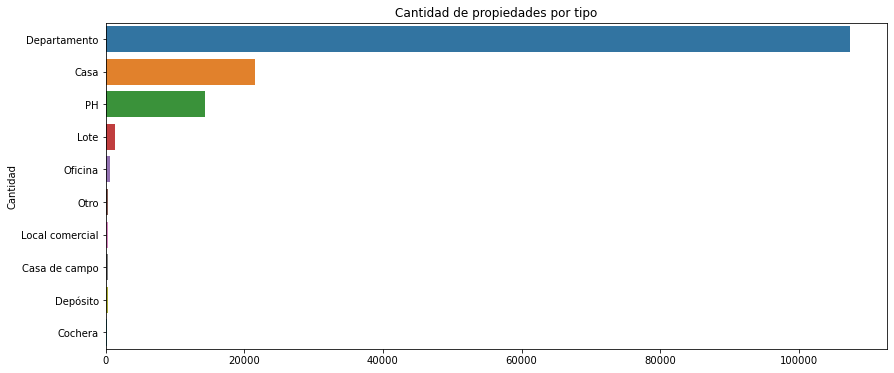

In [5]:
plt.figure(figsize = (14,6))
chart = sns.countplot(data = df,
                      y = "property_type",
                      order= df.property_type.value_counts().index)
chart.set(xlabel = None, ylabel = 'Cantidad')
plt.title('Cantidad de propiedades por tipo')
plt.show()

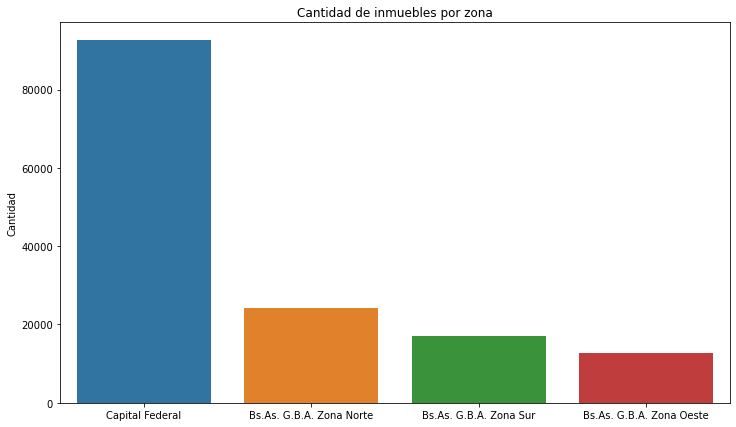

In [6]:
# Publicaciones por zona
plt.figure(figsize = (12,7))
l2 = sns.countplot(data=df,
                   x="l2",
                   order=df.l2.value_counts().index)
l2.set(xlabel = None, ylabel = 'Cantidad')
plt.title('Cantidad de inmuebles por zona')
plt.show()

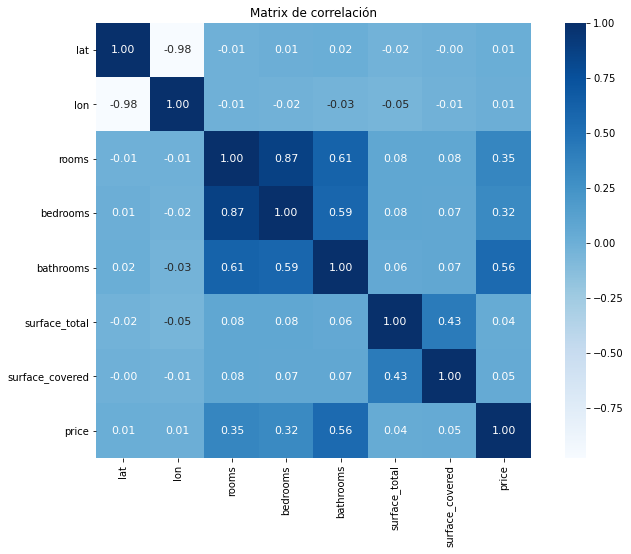

In [7]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 11}, cmap= 'Blues')
plt.title('Matrix de correlación')
plt.show()

# __Tasador con Machine Learning__

#### __0 - Dataset filtrado__

Vamos a filtrar por propiedades en __Ciudad de Buenos Aires__ que sean __PHs__, __Casas__ y __Departamentos__ e incluir los atributos `rooms`, `bedrooms`, `bathrooms`, `surface_covered`, `surface_total`, `price`. `property_type`, `lat`, `lon`, `l3`. 

In [8]:
# Filtro tipo de propiedad en Capital Federal

property_filter = ['Departamento', 'PH', 'Casa']
df2 = df[(df.property_type.isin(property_filter)) & (df.l2 == "Capital Federal")]

# Columnas elegidas (sumamos Lat, lon y property_type por lo visto en el P1)
columns = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 
           'price', 'property_type', 'lat', 'lon', 'l3' ] 

#Filtro final
df2 = df2[columns]

print('El dataset filtrado df2 (Deptos, PH, CASA en CABA) tiene', 
      df2.shape[1], 'columnas y', df2.shape[0], 'filas')

df2.isna().sum()

El dataset filtrado df2 (Deptos, PH, CASA en CABA) tiene 10 columnas y 91485 filas


rooms                 0
bedrooms              0
bathrooms          2171
surface_total      8917
surface_covered    9235
price                 0
property_type         0
lat                4534
lon                4548
l3                    0
dtype: int64

#### __1 - Detección y eliminación de Outliers__

##### __EDA Express__

El primer paso antes de pasar a la parte de los modelos es eliminar posibles outliers a modo de luego poder hacer otro tipo de procesamientos de los datos.

In [9]:
df2.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,lat,lon
count,91485.0,91485.0,89314.0,82568.0,82250.0,91485.0,86951.0,86937.0
mean,3.0,2.0,1.6,112.6,95.0,259500.3,-34.6,-58.4
std,1.3,1.1,0.9,980.7,778.5,322265.4,0.0,0.0
min,1.0,0.0,1.0,10.0,1.0,6000.0,-34.7,-58.5
25%,2.0,1.0,1.0,49.0,44.0,120000.0,-34.6,-58.5
50%,3.0,2.0,1.0,71.0,63.0,175000.0,-34.6,-58.4
75%,4.0,3.0,2.0,111.0,96.0,279000.0,-34.6,-58.4
max,26.0,15.0,14.0,126062.0,126062.0,32434232.0,-34.5,-58.4


Vemos valores atípicos de __precio__ como: Máximos de __USD 32.434.232__ y mínimos de __USD 6.000__. <br>
Vemos valores atípicos de __superficie total__ como: Máximos de __126.062 mt2__ y mínimos de __10 mt2__.<br>
Vemos valores atípicos de __superficie cubierta__ como: Máximos de __126.062 mt2__ y mínimos de __1 mt2__.<br>
Vemos valores atípicos de __habitaciones__ como: Máximos de __15 HAB__ y mínimos de __0 HAB__.<br>
Vemos valores atípicos de __baños__ como: Máximos de __14 Baños__.<br>
Vemos valores atípicos de __ambientes__ como: Máximos de __26 ambientes__.

Vamos a trabajar con métido de __Rango Intercuartílico__ donde cualquier número fuera de este rango (mutiplicado por la constante 1.5 para discernir verdaderos outliers) es un valor atípico. 

##### __Rango IQR__

In [10]:
# Filtra por rango IQR * 1.5

def iqr (feature, dataframe):
    q25,q75 = np.nanpercentile(dataframe[feature].values, [25,75])
    iqr = q75 - q25
    minimo = round(q25 - 1.5 * iqr)
    maximo = round(q75 + 1.5 * iqr)
    mascara1 = (dataframe[feature] < minimo) | (dataframe[feature] > maximo)
    dataframe = dataframe[~mascara1]
    
    return dataframe

##### __Eliminación de Outliers__

In [11]:
columns = ['price', 'surface_covered', 'surface_total','rooms', 'bedrooms', 'bathrooms' ]

for col in columns:
    df2 = iqr (col, df2)
    
df2.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,lat,lon
count,75211.000000,75211.000000,73304.000000,67133.000000,66866.000000,75211.000000,71898.000000,71887.000000
mean,2.580806,1.660741,1.324880,67.913455,60.534592,177828.476686,-34.599394,-58.437407
std,0.906342,0.786939,0.567047,28.289927,24.503075,87974.669080,0.023526,0.035314
min,1.000000,0.000000,1.000000,10.000000,1.000000,7500.000000,-34.696419,-58.530467
25%,2.000000,1.000000,1.000000,46.000000,42.000000,114000.000000,-34.613799,-58.460145
50%,3.000000,2.000000,1.000000,62.000000,55.000000,155750.000000,-34.600161,-58.434603
75%,3.000000,2.000000,2.000000,84.000000,75.000000,223000.000000,-34.585381,-58.412973
max,4.000000,4.000000,4.000000,154.000000,146.000000,517266.000000,-34.535818,-58.353930


#### __2 -  Corrección de valores mal ingresados e Imputación__

##### <font color=Blue>__Bedrooms__</font>

Los 2200 valores `bedrooms` con valor 0 decidimos tratarlos como __NaNs__ e imputar. 2173 son monoambientes, por lo tanto le vamos a imputarlos con el valor 1. 

In [12]:
print(df2.bedrooms.value_counts())
print(df2[(df2.bedrooms == 0)].rooms.value_counts())

1.0    33686
2.0    26843
3.0    12394
0.0     2200
4.0       88
Name: bedrooms, dtype: int64
1.0    2173
3.0      12
2.0      12
4.0       3
Name: rooms, dtype: int64


In [13]:
condition = (df2.rooms == 1) & (df2.bedrooms == 0)
df2.bedrooms[condition] = df2.bedrooms[condition].replace(0,1)

# Los restante los eliminamos
df2 = df2[df2.bedrooms > 0]

df2.bedrooms.value_counts()

1.0    35859
2.0    26843
3.0    12394
4.0       88
Name: bedrooms, dtype: int64

##### <font color=Blue>__Superficie Cubierta y Superficie total__</font>

###### Imputación valores `surface_total` <-> `surface_covered`

In [14]:
condition = (df2.surface_covered > df2.surface_total)
df2.surface_covered, df2.surface_total = np.where(condition, [df2.surface_total, df2.surface_covered], [df2.surface_covered, df2.surface_total])

###### Imputación valores null en `surface_total`

La variable más correlacionada con __surface_total__ es __rooms__. Por lo tanto, la vamos a tomar para imputar los valores de mediana dependiendo las instancias. 

In [16]:
values_median_rooms = round(df2.groupby('rooms')['surface_total'].median())

df2.surface_total = df2.surface_total.fillna(df2.rooms.map(values_median_rooms))

###### Imputación valores null en `surface_covered`

Sabemos que la correlación entre `surface_covered` y `surface_total` es de 92%.

In [17]:
null = df2.surface_covered.isnull()
df2.surface_covered = np.where(null, df2.surface_total, df2.surface_covered)

###### Imputación valores atípicos bajos en `surface_covered` _(Que no fueron filtrados por IQR)_ Los que tienen valores de `surface_total` correcto se les asigna ese valor. Los demás se eliminan.

In [18]:
rare = df2.surface_covered < 13.0
df2.surface_covered = np.where(rare, df2.surface_total, df2.surface_covered)
 
df2 = df2.drop(df2[(df2.surface_covered < 13.0)].index)

##### <font color=Blue>__Latitud y Longitud__</font>

Imputación de datos faltantes en `lat` y de `lon`.

In [19]:
valores_medios_lat = df2.groupby('l3')['lat'].mean()
valores_medios_lon = df2.groupby('l3')['lon'].mean()

df2.lat = df2.lat.fillna(df2.l3.map(valores_medios_lat))
df2.lon = df2.lon.fillna(df2.l3.map(valores_medios_lon))

df2 = df2.drop(columns=['l3'])
df2.describe()

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,lat,lon
count,75183.000000,75183.000000,73277.000000,75183.000000,75183.00000,75183.000000,75183.000000,75183.000000
mean,2.580796,1.690249,1.324904,67.109613,60.50272,177826.457577,-34.599164,-58.436880
std,0.906403,0.741982,0.567063,27.792251,24.20629,87976.086654,0.023399,0.035135
min,1.000000,1.000000,1.000000,13.000000,13.00000,7500.000000,-34.696419,-58.530467
25%,2.000000,1.000000,1.000000,46.000000,42.00000,114000.000000,-34.613682,-58.459479
50%,3.000000,2.000000,1.000000,61.000000,55.00000,155583.000000,-34.599666,-58.434109
75%,3.000000,2.000000,2.000000,83.000000,74.00000,223000.000000,-34.585766,-58.412600
max,4.000000,4.000000,4.000000,154.000000,153.00000,517266.000000,-34.535818,-58.353930


##### <font color=Blue>__Price__</font>

Eliminamos valores muy bajos de `price`. La hipótesis que vamos a tomar, basado en búsquedas en intenet de propiedades similares, es que muchas veces se publican precios de inmuebles que aún no han sido construidos y son oportunidades de negocio. La otra hipótesis es que simplemente, pueden estar cargados y son alquileres. Según nuestra búsqueda en portales web no existen propiedades de menos de USD 25.000.

Ejemplo de descripciones:

1 - AV SAN MARTIN 1244 - VENTA DE POZO ENTREGA FEB...<br>
2 - Crowdfunding - Inverti en Palermo - Desde 4 mts2<br>
3 - OPORTUNIDAD DE INVERSION !<br>

In [20]:
print(df2[df2.price <= 25000].price.count())
df2 = df2.drop(df2[df2.price <= 25000].index)
print(df2[df2.price <= 25000].price.count())
df2.isna().sum()

19
0


rooms                 0
bedrooms              0
bathrooms          1905
surface_total         0
surface_covered       0
price                 0
property_type         0
lat                   0
lon                   0
dtype: int64

##### __Bathrooms__

Imputamos por el valor medio de `bathroom`que es el atributo más correlacionado.

In [21]:
values_mean_bathrooms = round(df2.groupby('bedrooms')['bathrooms'].mean())
df2.bathrooms = df2.bathrooms.fillna(df2.bedrooms.map(values_mean_bathrooms))

##### __Dataset Preprocesado__

Quitamos `l3`, que son los barrios. Esta variable sirvió para imputar valores de `lat` y `lon`).

In [22]:
df2 = df2.reset_index(drop=True)

In [ ]:
df2.describe()

#### __3 -  Encoders__

Vamos a crear variables numéricas para __property_type__

In [ ]:
new_columns = pd.get_dummies(df2.property_type)
df2 = pd.concat([df2, new_columns], axis=1)
df_final = df2.drop(columns=['property_type'])
print('El dataset original tiene', df2.shape[1], 'columnas y', df2.shape[0], 'filas')
df_final.describe()

#### __4 - Train_Test_Split y Normalización__

In [ ]:
from sklearn.model_selection import train_test_split

columns = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'lat', 'lon', 'Casa', 'Departamento', 'PH' ]
#columns = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']

X = df_final[columns]
y = df_final.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### __5 - Modelo KNN__

##### __Función Eval__

In [ ]:
def eval_model (X_train, X_test, y_train, y_test, y_train_pred, y_test_pred):
    
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import mean_squared_error
    #from sklearn.metrics import mean_absolute_error#

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    #mae_train = np.sqrt(mean_absolute_error(y_train, y_train_pred))
    #mae_test = np.sqrt(mean_absolute_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    #print(f'Error absoluto medio en train: {mae_train}')
    #print(f'Error absoluto medio en test: {mae_test}')
    
    plt.figure(figsize = (15,7))
    
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 15, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 15, label = 'test')
    plt.xlabel('errores')
    plt.ticklabel_format(style = 'plain')
    plt.legend()
    
    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
 
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    #plt.tight_layout()
    plt.ticklabel_format(style = 'plain')
    plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn_regressor = KNeighborsRegressor()

param_grid = {'n_neighbors': [0,5,10,15],
               'weights' : ['uniform', 'distance']}

knn_regr_GS = GridSearchCV(knn_regressor, param_grid=param_grid, cv=5)

knn_regr_GS.fit(X_train, y_train)
print("Mejores parametros: "+str(knn_regr_GS.best_params_))
print("Mejor Score: "+str(knn_regr_GS.best_score_)+'\n')

y_test_pred = knn_regr_GS.predict(X_test)
y_train_pred = knn_regr_GS.predict(X_train)

In [ ]:
eval_model (X_train, X_test, y_train, y_test, y_train_pred, y_test_pred)

#### __6 - Puesta en producción__

In [ ]:
scaler_final = StandardScaler()
X = scaler_final.fit_transform(X)
knn_regressor = KNeighborsRegressor(n_neighbors=15, weights='distance')
knn_regressor.fit(X, y)
model = {"modelo":knn_regressor,
         "scaler":scaler_final}

In [ ]:
import pickle
with open('./tmp/model.pickle','wb') as file:
    pickle.dump(model, file)

In [ ]:
import pickle
with open('./tmp/model.pickle','wb') as file:
    pickle.dump(model, file)

#### __3 -  Encoders__

Vamos a crear variables numéricas para __property_type__

In [ ]:
new_columns = pd.get_dummies(df2.property_type)
df2 = pd.concat([df2, new_columns], axis=1)
df_final = df2.drop(columns=['property_type'])
print('El dataset original tiene', df2.shape[1], 'columnas y', df2.shape[0], 'filas')
df_final.describe()

#### __4 - Train_Test_Split y Normalización__

In [ ]:
from sklearn.model_selection import train_test_split

columns = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'lat', 'lon', 'Casa', 'Departamento', 'PH' ]
#columns = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']

X = df_final[columns]
y = df_final.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### __5 - Modelo KNN__

##### __Función Eval__

In [ ]:
def eval_model (X_train, X_test, y_train, y_test, y_train_pred, y_test_pred):
    
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import mean_squared_error
    #from sklearn.metrics import mean_absolute_error#

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    #mae_train = np.sqrt(mean_absolute_error(y_train, y_train_pred))
    #mae_test = np.sqrt(mean_absolute_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    #print(f'Error absoluto medio en train: {mae_train}')
    #print(f'Error absoluto medio en test: {mae_test}')
    
    plt.figure(figsize = (15,7))
    
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 15, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 15, label = 'test')
    plt.xlabel('errores')
    plt.ticklabel_format(style = 'plain')
    plt.legend()
    
    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
 
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    #plt.tight_layout()
    plt.ticklabel_format(style = 'plain')
    plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn_regressor = KNeighborsRegressor()

param_grid = {'n_neighbors': [0,5,10,15],
               'weights' : ['uniform', 'distance']}

knn_regr_GS = GridSearchCV(knn_regressor, param_grid=param_grid, cv=5)

knn_regr_GS.fit(X_train, y_train)
print("Mejores parametros: "+str(knn_regr_GS.best_params_))
print("Mejor Score: "+str(knn_regr_GS.best_score_)+'\n')

y_test_pred = knn_regr_GS.predict(X_test)
y_train_pred = knn_regr_GS.predict(X_train)

In [ ]:
eval_model (X_train, X_test, y_train, y_test, y_train_pred, y_test_pred)

#### __6 - Puesta en producción__

In [ ]:
scaler_final = StandardScaler()
X = scaler_final.fit_transform(X)
knn_regressor = KNeighborsRegressor(n_neighbors=15, weights='distance')
knn_regressor.fit(X, y)
model = {"modelo":knn_regressor,
         "scaler":scaler_final}

In [ ]:
import pickle
with open('./tmp/model.pickle','wb') as file:
    pickle.dump(model, file)

In [31]:
import pickle
with open('./tmp/model.pickle','wb') as file:
    pickle.dump(model, file)

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,lat,lon,Casa,Departamento,PH
count,75164.000000,75164.000000,75164.000000,75164.000000,75164.000000,75164.000000,75164.000000,75164.000000,75164.000000,75164.000000,75164.000000
mean,2.580970,1.690330,1.319382,67.116825,60.508368,177867.680805,-34.599158,-58.436871,0.008076,0.902773,0.089152
std,0.906321,0.742001,0.563054,27.789677,24.204058,87948.950670,0.023394,0.035130,0.089502,0.296269,0.284965
min,1.000000,1.000000,1.000000,13.000000,13.000000,25500.000000,-34.696419,-58.530467,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,46.000000,42.000000,114000.000000,-34.613672,-58.459478,0.000000,1.000000,0.000000
50%,3.000000,2.000000,1.000000,61.000000,55.000000,155994.000000,-34.599658,-58.434109,0.000000,1.000000,0.000000
75%,3.000000,2.000000,2.000000,83.000000,74.000000,223000.000000,-34.585766,-58.412600,0.000000,1.000000,0.000000
max,4.000000,4.000000,4.000000,154.000000,153.000000,517266.000000,-34.535818,-58.353930,1.000000,1.000000,1.000000


#### __3 -  Encoders__

Vamos a crear variables numéricas para __property_type__

In [23]:
new_columns = pd.get_dummies(df2.property_type)
df2 = pd.concat([df2, new_columns], axis=1)
df_final = df2.drop(columns=['property_type'])
print('El dataset original tiene', df2.shape[1], 'columnas y', df2.shape[0], 'filas')
df_final.describe()

El dataset original tiene 12 columnas y 75164 filas


,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,lat,lon,Casa,Departamento,PH
count,75164.000000,75164.000000,75164.000000,75164.000000,75164.000000,75164.000000,75164.000000,75164.000000,75164.000000,75164.000000,75164.000000
mean,2.580970,1.690330,1.319382,67.116825,60.508368,177867.680805,-34.599158,-58.436871,0.008076,0.902773,0.089152
std,0.906321,0.742001,0.563054,27.789677,24.204058,87948.950670,0.023394,0.035130,0.089502,0.296269,0.284965
min,1.000000,1.000000,1.000000,13.000000,13.000000,25500.000000,-34.696419,-58.530467,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,46.000000,42.000000,114000.000000,-34.613672,-58.459478,0.000000,1.000000,0.000000
50%,3.000000,2.000000,1.000000,61.000000,55.000000,155994.000000,-34.599658,-58.434109,0.000000,1.000000,0.000000
75%,3.000000,2.000000,2.000000,83.000000,74.000000,223000.000000,-34.585766,-58.412600,0.000000,1.000000,0.000000
max,4.000000,4.000000,4.000000,154.000000,153.000000,517266.000000,-34.535818,-58.353930,1.000000,1.000000,1.000000


#### __4 - Train_Test_Split y Normalización__

In [24]:
from sklearn.model_selection import train_test_split

columns = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'lat', 'lon', 'Casa', 'Departamento', 'PH' ]
#columns = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered']

X = df_final[columns]
y = df_final.price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### __5 - Modelo KNN__

##### __Función Eval__

In [26]:
def eval_model (X_train, X_test, y_train, y_test, y_train_pred, y_test_pred):
    
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.metrics import mean_squared_error
    #from sklearn.metrics import mean_absolute_error#

    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    #mae_train = np.sqrt(mean_absolute_error(y_train, y_train_pred))
    #mae_test = np.sqrt(mean_absolute_error(y_test, y_test_pred))
    print(f'Raíz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raíz del error cuadrático medio en Test: {rmse_test}')
    #print(f'Error absoluto medio en train: {mae_train}')
    #print(f'Error absoluto medio en test: {mae_test}')
    
    plt.figure(figsize = (15,7))
    
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 15, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 15, label = 'test')
    plt.xlabel('errores')
    plt.ticklabel_format(style = 'plain')
    plt.legend()
    
    
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_test_pred, s =2)
 
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]
    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    #plt.tight_layout()
    plt.ticklabel_format(style = 'plain')
    plt.show()

In [27]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

knn_regressor = KNeighborsRegressor()

param_grid = {'n_neighbors': [0,5,10,15],
               'weights' : ['uniform', 'distance']}

knn_regr_GS = GridSearchCV(knn_regressor, param_grid=param_grid, cv=5)

knn_regr_GS.fit(X_train, y_train)
print("Mejores parametros: "+str(knn_regr_GS.best_params_))
print("Mejor Score: "+str(knn_regr_GS.best_score_)+'\n')

y_test_pred = knn_regr_GS.predict(X_test)
y_train_pred = knn_regr_GS.predict(X_train)

Mejores parametros: {'n_neighbors': 15, 'weights': 'distance'}
Mejor Score: 0.8840220734471987



Raíz del error cuadrático medio en Train: 6523.888668285026
Raíz del error cuadrático medio en Test: 28629.170441154653


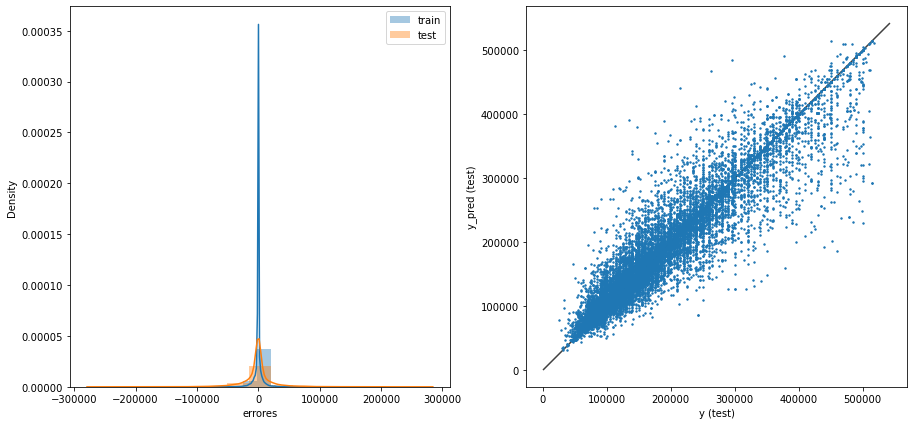

In [32]:
eval_model (X_train, X_test, y_train, y_test, y_train_pred, y_test_pred)

#### __6 - Puesta en producción__

In [ ]:
scaler_final = StandardScaler()
X = scaler_final.fit_transform(X)
knn_regressor = KNeighborsRegressor(n_neighbors=15, weights='distance')
knn_regressor.fit(X, y)
model = {"modelo":knn_regressor,
         "scaler":scaler_final}

In [ ]:
import pickle
with open('./tmp/model.pickle','wb') as file:
    pickle.dump(model, file)